
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [9]:

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data.csv", delimiter=",", skiprows=1)

X = data[:, :-1] 
y = data[:, -1]  


In [10]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):

        self.mean_ = np.mean(X, axis=0)
        
        
        self.std_ = np.std(X, axis=0)
        
        self.std_[self.std_ == 0] = 1.0

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [11]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0.0
        
        self.losses = []

        for _ in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.w) + self.b
            
            # Errors
            error = y_pred - y
            
            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, error) \
                 + (self.l2_lambda / n_samples) * self.w
            db = (1 / n_samples) * np.sum(error)
            
            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            # Loss computation
            mse = (1 / (2 * n_samples)) * np.sum(error ** 2)
            l2_term = (self.l2_lambda / (2 * n_samples)) * np.sum(self.w ** 2)
            loss = mse + l2_term
            
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.w) + self.b



In [14]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)


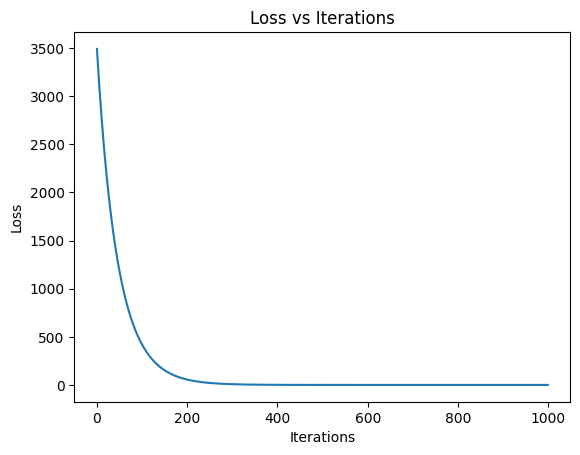

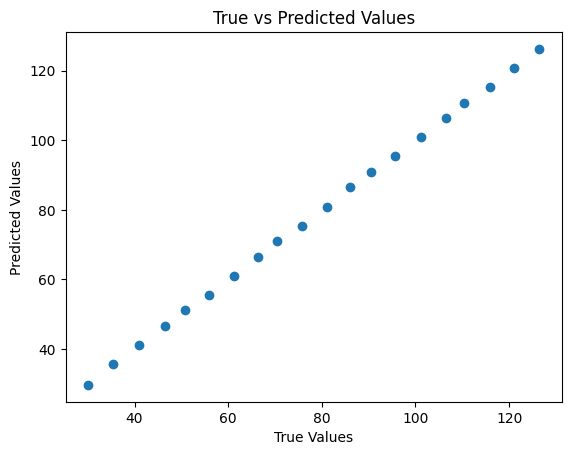

In [15]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [23]:
import numpy as np

data = np.loadtxt("logistic_data.csv", delimiter=",", skiprows=1)

X = data[:, :2]  
y = data[:, 2]


In [24]:
class StandardScalerManual:
    def fit(self, X):

        self.mean_ = np.mean(X, axis=0)
        
        
        self.std_ = np.std(X, axis=0)
        
        self.std_[self.std_ == 0] = 1.0

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [25]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [30]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.W = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.W = np.zeros(n_features)
        self.b = 0.0
        
        for epoch in range(self.epochs):
            
            z = np.dot(X, self.W) + self.b
            
            y_hat = sigmoid(z)
            
            loss = (
                -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
                + (self.l2_lambda / (2 * n_samples)) * np.sum(self.W ** 2)
            )
            self.losses.append(loss)
            
            # Gradients
            dW = (
                np.dot(X.T, (y_hat - y)) / n_samples
                + (self.l2_lambda / n_samples) * self.W
            )
            db = np.mean(y_hat - y)
            
            # Gradient descent update
            self.W -= self.lr * dW
            self.b -= self.lr * db


    def predict_proba(self, X):
        z = np.dot(X, self.W) + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)
    def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)



Final Accuracy: 100.00%


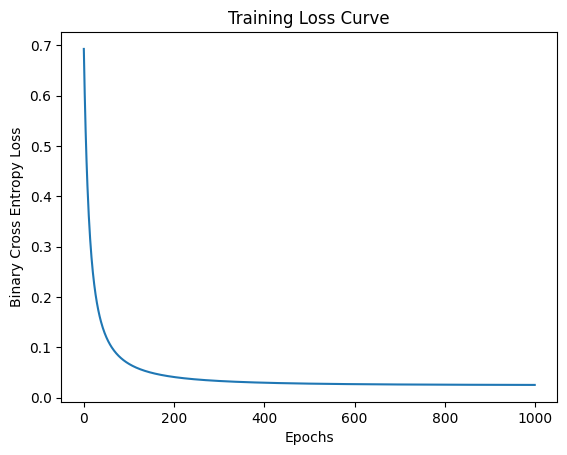

In [35]:

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
acc = accuracy(y, y_pred)

print(f"Final Accuracy: {acc * 100:.2f}%")

plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
